<a href="https://colab.research.google.com/github/adkekisheva/-_-/blob/main/lab2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 4.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626450 sha256=7f3f4afec0d50150762e735f6a4bfc962f516b7e81aa352ceaeb542aec917137
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
import os
import pandas as pd
import numpy as np
from surprise import *
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict
from surprise import accuracy

In [ ]:
col_names=['UserID',
           'ISBN',
           'BookRating']
books_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=',', encoding='latin-1', error_bad_lines=False, names=col_names, skiprows=[0])


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [ ]:
books_ratings

UserID         ISBN  BookRating
0         16916   0425120279           0
1         16916   0425129632           0
2         16916   0425138232           0
3         16916   0425142868           0
4         16916   0425147622           0
...         ...          ...         ...
1068430  276704   1563526298           9
1068431  276706   0679447156           0
1068432  276709   0515107662          10
1068433  276721   0590442449          10
1068434  276723  05162443314           8

[1068435 rows x 3 columns]

In [ ]:
books_ratings = books_ratings[books_ratings['BookRating'] != 0]

In [ ]:
books_ratings

UserID         ISBN  BookRating
10        16916   0425163407          10
17        16916   0425187063          10
20        16916   0425191192           6
49        16916   0440214041          10
56        16916   0440222656           7
...         ...          ...         ...
1068428  276704   0806917695           5
1068430  276704   1563526298           9
1068432  276709   0515107662          10
1068433  276721   0590442449          10
1068434  276723  05162443314           8

[398693 rows x 3 columns]

In [ ]:
col_names=['ISBN',
           'Book-Title',
           'Book-Author',
           'Year-Of-Publication',
           'Publisher',
           'Image-URL-S',
           'Image-URL-M',
           'Image-URL-L']

In [ ]:
books = pd.read_csv('BX_Books.csv', sep=',', encoding='latin-1', error_bad_lines=False, names=col_names, skiprows=[0])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [ ]:
books.head()

ISBN                                         Book-Title  \
0  0030149061                          The Doonesbury Chronicles   
1  0312942192                                     Huysman's Pets   
2  0879830689  The healing benefits of acupressure: Acupunctu...   
3  0671027972                                    Single & Single   
4  0312970307  Burned Alive : A Shocking True Story of Betray...   

      Book-Author Year-Of-Publication                Publisher  \
0    G.B. Trudeau                1975        Granite Impex Ltd   
1    Kate Wilhelm                1986            St Martins Pr   
2    F. M Houston                1974                Keats Pub   
3   John le Carre                2000                   Pocket   
4  Kieran Crowley                1999  St. Martin's True Crime   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0030149061.0...   
1  http://images.amazon.com/images/P/0312942192.0...   
2  http://images.amazon.com/images/P/0879830689.0...   
3  http://images.amazon.com/images/P/0671027972.0...   
4  http://images.amazon.com/images/P/0312970307.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0030149061.0...   
1  http://images.amazon.com/images/P/0312942192.0...   
2  http://images.amazon.com/images/P/0879830689.0...   
3  http://images.amazon.com/images/P/0671027972.0...   
4  http://images.amazon.com/images/P/0312970307.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0030149061.0...  
1  http://images.amazon.com/images/P/0312942192.0...  
2  http://images.amazon.com/images/P/0879830689.0...  
3  http://images.amazon.com/images/P/0671027972.0...  
4  http://images.amazon.com/images/P/0312970307.0...

In [ ]:
books_ratings.UserID=books_ratings.UserID.astype(str)
books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398693 entries, 10 to 1068434
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   UserID      398693 non-null  object
 1   ISBN        398693 non-null  object
 2   BookRating  398693 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 12.2+ MB


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
reader = Reader(line_format='user item rating', sep="\t")
reader = Reader(rating_scale=(0.5, 10.0))
df = Dataset.load_from_df(books_ratings, reader)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        
        
        '''))


In [ ]:
configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

data = books_ratings["BookRating"].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / books_ratings.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} ratings'.format(books_ratings.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)
     

In [ ]:
configure_plotly_browser_state()


data = books_ratings.groupby('ISBN')['BookRating'].count().clip(upper=50)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Item (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
data

ISBN
 0330299891      1
 0375404120      1
'9607092910'     1
0 00 655241 2    1
0 09 944678 2    1
                ..
Y99697115        1
Z380703475       1
ooo7156103       1
´3499128624      1
Ô½crosoft        1
Name: BookRating, Length: 175687, dtype: int64

In [ ]:
type(data)

pandas.core.series.Series

In [ ]:
type(df)

surprise.dataset.DatasetAutoFolds

In [ ]:

!pip install plotly
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

## **Вот эта часть кода снизу, которая меня бесит**

In [ ]:
param_grid = {'n_factors': [25], 'n_epochs': [15], 'lr_all': [0.001, 0.003],
              'reg_all': [0.08, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, joblib_verbose = 432)

gs.fit(df)

algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Assigning values
t = gs.best_params
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs']
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   33.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   37.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   42.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   47.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   54.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   59.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [ ]:
print(gs.best_score['mae'])
print(gs.best_params['mae'])

1.2857107209514376
{'n_factors': 25, 'n_epochs': 15, 'lr_all': 0.003, 'reg_all': 0.08}


In [ ]:
trainset, testset = train_test_split(df, test_size=0.25)
algo = SVD(n_factors = 25, n_epochs = 15, lr_all = 0.003, reg_all = 0.1)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 1.6452


1.6452189196139109

In [ ]:
def get_Iu(uid):
    """ 
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ 
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

    
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)


In [ ]:
df_predictions.head()

uid         iid  rui       est                    details    Iu  Ui  \
0  153662  0451404114  7.0  8.507032  {'was_impossible': False}  1456   0   
1   95964  8423309835  7.0  7.807636  {'was_impossible': False}     0   4   
2  101550  0582084822  7.0  8.052434  {'was_impossible': False}    91   0   
3  123883  0872862097  5.0  5.103158  {'was_impossible': False}   340   2   
4  180957  0743224132  9.0  7.193812  {'was_impossible': False}    35   0   

        err  
0  1.507032  
1  0.807636  
2  1.052434  
3  0.103158  
4  1.806188

In [ ]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]
best_predictions

uid         iid   rui   est                    details   Iu   Ui  \
97722   56959  0439136350  10.0  10.0  {'was_impossible': False}  295   99   
30980  274061  0345339681  10.0  10.0  {'was_impossible': False}  166  118   
86521  138602  043935806X  10.0  10.0  {'was_impossible': False}   43  150   
66392  274061  0451173317  10.0  10.0  {'was_impossible': False}  166   18   
2069   182086  0515102636  10.0  10.0  {'was_impossible': False}  133   18   
64602  104399  039480001X  10.0  10.0  {'was_impossible': False}  106   15   
15441  175003  0439139597  10.0  10.0  {'was_impossible': False}   29   98   
15511   56399  0451169530  10.0  10.0  {'was_impossible': False}  686   52   
69668   78553  006440188X  10.0  10.0  {'was_impossible': False}  176   16   
14146  175003  059035342X  10.0  10.0  {'was_impossible': False}   29  228   

       err  
97722  0.0  
30980  0.0  
86521  0.0  
66392  0.0  
2069   0.0  
64602  0.0  
15441  0.0  
15511  0.0  
69668  0.0  
14146  0.0

In [ ]:
worst_predictions

uid         iid  rui       est                    details   Iu  Ui  \
23224   76499  0816628017  1.0  8.786990  {'was_impossible': False}  803   0   
78003   76499  014044145X  1.0  8.786990  {'was_impossible': False}  803   0   
58588   76499  0156701537  1.0  8.813897  {'was_impossible': False}  803   1   
64979   76499  0679732373  1.0  8.870525  {'was_impossible': False}  803   1   
77138   51883  0449133931  1.0  8.914925  {'was_impossible': False}  271   0   
38505   51883  0373224672  1.0  8.914925  {'was_impossible': False}  271   0   
57883   76499  0671867806  1.0  8.938702  {'was_impossible': False}  803   1   
7779    28938  0310205719  1.0  8.983538  {'was_impossible': False}   51  25   
73201   76151  0446363707  1.0  9.037651  {'was_impossible': False}  142   1   
59079  255092  1570629714  1.0  9.151842  {'was_impossible': False}   60   0   

            err  
23224  7.786990  
78003  7.786990  
58588  7.813897  
64979  7.870525  
77138  7.914925  
38505  7.914925  
57883  7.938702  
7779   7.983538  
73201  8.037651  
59079  8.151842

In [ ]:
temp = books_ratings.loc[books_ratings['ISBN'] == '0155061224']['BookRating']
configure_plotly_browser_state()

# Create trace
trace = go.Histogram(x = temp.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 5, size=.3))
 # Create layout
layout = go.Layout(title = 'Number of ratings item 3996 has received',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
final = []

for threshold in np.arange(0, 5.5, 0.5):
    tp=0
    fn=0
    fp=0
    tn=0
    temp = []

    for uid, _, true_r, est, _ in predictions:
        if(true_r>=threshold):
            if(est>=threshold):
                tp = tp+1
            else:
                fn = fn+1
        else:
            if(est>=threshold):
                fp = fp+1
            else:
                tn = tn+1   

        if tp == 0:
            precision = 0
            recall = 0
            f1 = 0
        else:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1 = 2 * (precision * recall) / (precision + recall)  

    temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
    final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)
results

threshold     tp    fp  tn  fn  Precision    Recall        F1
0         0.0  99674     0   0   0   1.000000  1.000000  1.000000
1         0.5  99674     0   0   0   1.000000  1.000000  1.000000
2         1.0  99674     0   0   0   1.000000  1.000000  1.000000
3         1.5  99282   392   0   0   0.996067  1.000000  0.998030
4         2.0  99282   392   0   0   0.996067  1.000000  0.998030
5         2.5  98653  1021   0   0   0.989757  1.000000  0.994852
6         3.0  98653  1021   0   0   0.989757  1.000000  0.994852
7         3.5  97310  2364   0   0   0.976283  1.000000  0.987999
8         4.0  97309  2363   1   1   0.976292  0.999990  0.987999
9         4.5  95342  4322   7   3   0.956634  0.999969  0.977822
10        5.0  95250  4240  89  95   0.957383  0.999004  0.977750

In [ ]:



def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [ ]:



results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=2.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

[{'K': 2, 'Precision': 0.9878643852978454, 'Recall': 0.8615090192764604},
 {'K': 3, 'Precision': 0.9875422475707648, 'Recall': 0.9080639928926436},
 {'K': 4, 'Precision': 0.9873732572877061, 'Recall': 0.932289521809404},
 {'K': 5, 'Precision': 0.9872940430925216, 'Recall': 0.9471121587611628},
 {'K': 6, 'Precision': 0.9872613012251792, 'Recall': 0.957150940393039},
 {'K': 7, 'Precision': 0.9872356509143582, 'Recall': 0.9643405629252282},
 {'K': 8, 'Precision': 0.9872084917617235, 'Recall': 0.9696733575519232},
 {'K': 9, 'Precision': 0.9872155330235173, 'Recall': 0.9738759218364342},
 {'K': 10, 'Precision': 0.9871993381213906, 'Recall': 0.9772968015332045}]

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


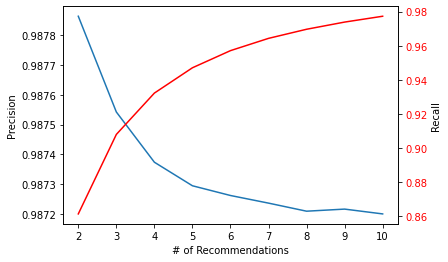

In [ ]:
Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')
    ###


In [ ]:
trainset = df.build_full_trainset()   #Build on entire data set
testset = trainset.build_testset()
algo = SVD(n_factors= 25, n_epochs= 15, lr_all= 0.003, reg_all= 0.08)
algo.fit(trainset)
print('dknjdn')
# Predict ratings for all pairs (u, i) that are NOT in the training set.


print('dknjdn', 2)
#Predicting the ratings for testset
predictions = algo.test(testset)


dknjdn
dknjdn 2


In [ ]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n


In [ ]:
all_pred = get_all_predictions(predictions)

In [ ]:
n = 4

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
tmp = pd.DataFrame.from_dict(all_pred, orient='index')
# tmp_transpose = tmp.transpose()
tmp

0                                1  \
16916     (0842329269, 9.49798404579387)  (0842329250, 9.410708274870728)   
16919   (0140119906, 7.9867490220893425)  (155111222x, 7.768155725670148)   
16923    (0140327592, 7.623258359157087)                             None   
16935    (0345441036, 7.529199583714234)  (0440222842, 7.393317598252311)   
16937    (8674460232, 7.834617098566235)                             None   
...                                  ...                              ...   
276688   (0836236688, 8.105312705446932)  (031208188X, 7.970563645092048)   
276704   (1563526298, 7.442226320360456)  (0380796155, 7.255379020598832)   
276709   (0515107662, 7.996300109875678)                             None   
276721   (0590442449, 7.879133031965615)                             None   
276723  (05162443314, 7.645963936344378)                             None   

                                      2                                3  
16916     (0842329218, 9.2394429444611)   (0842329242, 9.16202462723647)  
16919   (0446344109, 7.755119495331187)  (092174515X, 7.702577154058448)  
16923                              None                             None  
16935   (0345346521, 7.324422340801847)  (1555216633, 7.315928924813481)  
16937                              None                             None  
...                                 ...                              ...  
276688  (0684195569, 7.894088630544396)  (0394748646, 7.861842696427681)  
276704   (0806917695, 7.22464430746435)  (0743211383, 6.921997917796162)  
276709                             None                             None  
276721                             None                             None  
276723                             None                             None  

[72594 rows x 4 columns]

In [ ]:

def get_predictions(user_id):
    results = tmp.loc[user_id]
    return results

In [ ]:
results = get_predictions("276704")
results

0    (1563526298, 7.442226320360456)
1    (0380796155, 7.255379020598832)
2     (0806917695, 7.22464430746435)
3    (0743211383, 6.921997917796162)
Name: 276704, dtype: object

In [ ]:
recommended_books_ids=[]
for x in range(0, n):
    recommended_books_ids.append(results[x][0])

recommended_books_ids

['1563526298', '0380796155', '0806917695', '0743211383']

In [ ]:


recommended_books = books[books['ISBN'].isin(recommended_books_ids)]


In [ ]:
recommended_books

ISBN                                         Book-Title  \
6148   0380796155                                       White Abacus   
47120  0806917695  Perplexing Lateral Thinking Puzzles: Scholasti...   
47123  1563526298  Get Clark Smart : The Ultimate Guide for the S...   

            Book-Author Year-Of-Publication            Publisher  \
6148   Damien Broderick                1998                  Eos   
47120       Paul Sloane                1997  Sterling Publishing   
47123      Clark Howard                2000     Longstreet Press   

                                             Image-URL-S  \
6148   http://images.amazon.com/images/P/0380796155.0...   
47120  http://images.amazon.com/images/P/0806917695.0...   
47123  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-M  \
6148   http://images.amazon.com/images/P/0380796155.0...   
47120  http://images.amazon.com/images/P/0806917695.0...   
47123  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-L  
6148   http://images.amazon.com/images/P/0380796155.0...  
47120  http://images.amazon.com/images/P/0806917695.0...  
47123  http://images.amazon.com/images/P/1563526298.0...

In [ ]:
books_ratings

UserID         ISBN  BookRating
10        16916   0425163407          10
17        16916   0425187063          10
20        16916   0425191192           6
49        16916   0440214041          10
56        16916   0440222656           7
...         ...          ...         ...
1068428  276704   0806917695           5
1068430  276704   1563526298           9
1068432  276709   0515107662          10
1068433  276721   0590442449          10
1068434  276723  05162443314           8

[398693 rows x 3 columns]

In [ ]:



temp = books_ratings[books_ratings['UserID'] == "276704"].sort_values("BookRating", ascending = False)
temp.head()


UserID        ISBN  BookRating
1068430  276704  1563526298           9
1068426  276704  0743211383           7
1068416  276704  0345386108           6
1068417  276704  0380796155           5
1068428  276704  0806917695           5

In [ ]:
temp.shape

(5, 3)

In [ ]:

history_books_ids = temp['ISBN']
user_history = books[books['ISBN'].isin(history_books_ids)]

In [ ]:
user_history[:n]

ISBN                                         Book-Title  \
6148   0380796155                                       White Abacus   
47120  0806917695  Perplexing Lateral Thinking Puzzles: Scholasti...   
47123  1563526298  Get Clark Smart : The Ultimate Guide for the S...   

            Book-Author Year-Of-Publication            Publisher  \
6148   Damien Broderick                1998                  Eos   
47120       Paul Sloane                1997  Sterling Publishing   
47123      Clark Howard                2000     Longstreet Press   

                                             Image-URL-S  \
6148   http://images.amazon.com/images/P/0380796155.0...   
47120  http://images.amazon.com/images/P/0806917695.0...   
47123  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-M  \
6148   http://images.amazon.com/images/P/0380796155.0...   
47120  http://images.amazon.com/images/P/0806917695.0...   
47123  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-L  
6148   http://images.amazon.com/images/P/0380796155.0...  
47120  http://images.amazon.com/images/P/0806917695.0...  
47123  http://images.amazon.com/images/P/1563526298.0...

In [ ]:
recommended_books

ISBN                                         Book-Title  \
6148   0380796155                                       White Abacus   
47120  0806917695  Perplexing Lateral Thinking Puzzles: Scholasti...   
47123  1563526298  Get Clark Smart : The Ultimate Guide for the S...   

            Book-Author Year-Of-Publication            Publisher  \
6148   Damien Broderick                1998                  Eos   
47120       Paul Sloane                1997  Sterling Publishing   
47123      Clark Howard                2000     Longstreet Press   

                                             Image-URL-S  \
6148   http://images.amazon.com/images/P/0380796155.0...   
47120  http://images.amazon.com/images/P/0806917695.0...   
47123  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-M  \
6148   http://images.amazon.com/images/P/0380796155.0...   
47120  http://images.amazon.com/images/P/0806917695.0...   
47123  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-L  
6148   http://images.amazon.com/images/P/0380796155.0...  
47120  http://images.amazon.com/images/P/0806917695.0...  
47123  http://images.amazon.com/images/P/1563526298.0...